1. Simple regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1.8 Example

In [2]:
# X : temperature
# Y : Monthly average family expenditure for icecream and sherbet
X = np.array([
     9.1, 11.2, 12.3, 18.9, 22.2, 26. , 30.9, 31.2, 28.8, 23. , 18.3,
    11.1,  8.3,  9.1, 12.5, 18.5, 23.6, 24.8, 30.1, 33.1, 29.8, 23. ,
    16.3, 11.2,  9.6, 10.3, 16.4, 19.2, 24.1, 26.5, 31.4, 33.2, 28.8,
    23. , 17.4, 12.1, 10.6,  9.8, 14.5, 19.6, 24.7, 26.9, 30.5, 31.2,
    26.9, 23. , 17.4, 11. , 10.4, 10.4, 15.5, 19.3, 26.4, 26.4, 30.1,
    30.5, 26.4, 22.7, 17.8, 13.4, 10.6, 12.2, 14.9, 20.3, 25.2, 26.3,
    29.7, 31.6, 27.7, 22.6, 15.5, 13.8, 10.8, 12.1, 13.4, 19.9, 25.1,
    26.4, 31.8, 30.4, 26.8, 20.1, 16.6, 11.1,  9.4, 10.1, 16.9, 22.1,
    24.6, 26.6, 32.7, 32.5, 26.6, 23. , 17.7, 12.1, 10.3, 11.6, 15.4,
    19. , 25.3, 25.8, 27.5, 32.8, 29.4, 23.3, 17.7, 12.6, 11.1, 13.3,
    16. , 18.2, 24. , 27.5, 27.7, 34.1, 28.1, 21.4, 18.6, 12.3])

Y = np.array([
    463.,  360.,  380.,  584.,  763.,  886., 1168., 1325.,  847.,
    542.,  441.,  499.,  363.,  327.,  414.,  545.,  726.,  847.,
   1122., 1355.,  916.,  571.,  377.,  465.,  377.,  362.,  518.,
    683.,  838., 1012., 1267., 1464., 1000.,  629.,  448.,  466.,
    404.,  343.,  493.,  575.,  921., 1019., 1149., 1303.,  805.,
    739.,  587.,  561.,  486.,  470.,  564.,  609.,  899.,  946.,
   1295., 1325.,  760.,  667.,  564.,  633.,  478.,  450.,  567.,
    611.,  947.,  962., 1309., 1307.,  930.,  668.,  496.,  650.,
    506.,  423.,  531.,  672.,  871.,  986., 1368., 1319.,  924.,
    716.,  651.,  708.,  609.,  535.,  717.,  890., 1054., 1077.,
   1425., 1378.,  900.,  725.,  554.,  542.,  561.,  459.,  604.,
    745., 1105.,  973., 1263., 1533., 1044.,  821.,  621.,  601.,
    549.,  572.,  711.,  819., 1141., 1350., 1285., 1643., 1133.,
    784.,  682.,  587.])

In [3]:
def show_graph(X, Y, x, y):
    # (X, Y) : data
    # (x, y) : regression line
    fig, ax = plt.subplots(dpi=100)
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'tab:red')
    ax.set_title('Relationship between temperature and family expenditure for icecream and sherbet')
    ax.set_xlabel('Monthly average temperature (Celsius)')
    ax.set_ylabel('Family expenditure (JPY)')
    ax.set_xlim(0, 35)
    ax.set_ylim(-250, 2000)
    ax.grid()
    fig.show()

1.8.1 numpy.polyfit

In [4]:
# linear regression model
W = np.polyfit(X, Y, 1)
W

array([38.46344295, -8.26568744])

<ipython-input-3-218180e74d07>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


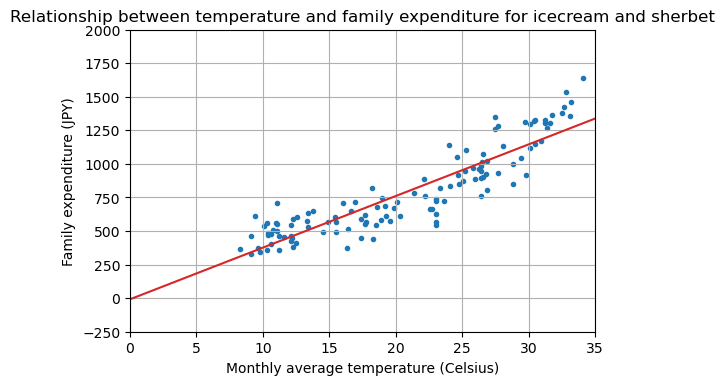

In [5]:
x = np.linspace(0, 35, 100)
y_hat = np.polyval(W, x)
show_graph(X, Y, x, y_hat)

1.8.2 sklearn.linear_model.LinearRegression

In [6]:
from sklearn.linear_model import LinearRegression

coefficient : [38.46344295]
intercept : -8.265687440297484
R^2 : 0.8123821444273189


<ipython-input-3-218180e74d07>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


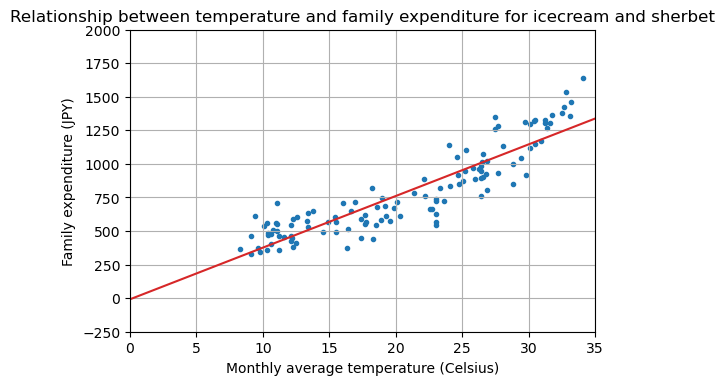

In [7]:
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), Y)
print(f'coefficient : {reg.coef_}')
print(f'intercept : {reg.intercept_}')
print(f'R^2 : {reg.score(X.reshape(-1, 1), Y)}')
x = np.linspace(0, 35, 100)
y_hat = reg.predict(x.reshape(-1, 1))
show_graph(X, Y, x, y_hat)

1.9 Exercise
Apply simple regression for the data below.

In [8]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
X = D[:,0]
Y = D[:,1]

In [9]:
# Simple regression
# y = ax + b
ave_X = np.average(X)
ave_Y = np.average(Y)

cov_X_Y = 0
var_X = 0
for i in range(len(D)):
    cov_X_Y += (X[i] - ave_X) * (Y[i] - ave_Y)
    var_X += (X[i] - ave_X) ** 2
cov_X_Y /= len(D)
var_X /= len(D)

a = cov_X_Y / var_X
b = ave_Y - a * ave_X

print(f'a : {a}')
print(f'b : {b}')

a : 0.43103448275862066
b : 3.3103448275862073


In [11]:
# Plot data and regression line
def show_graph_exercise(X, Y, x, y):
    # (X, Y) : data
    # (x, y) : regression line
    fig, ax = plt.subplots(dpi=100)
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'tab:red')
    ax.set_title('Exercise')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.grid()
    fig.show()

<ipython-input-11-6b97762c850f>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


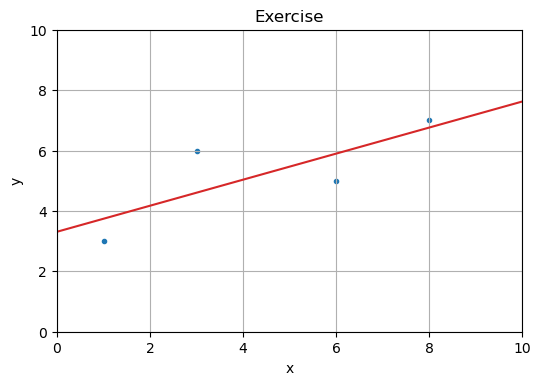

In [13]:
x = np.linspace(0, 10, 100)
y_hat = a * x + b

show_graph_exercise(X, Y, x, y_hat)

In [18]:
# Calculate residual error
Y_hat = a * X + b
epsilon = Y - Y_hat
print(f'epsilon : {epsilon}')

epsilon : [-0.74137931  1.39655172 -0.89655172  0.24137931]


In [21]:
# Cov(X, epsilon)
ave_e = np.average(epsilon) # == 0
cov_X_e = 0
for i in range(len(X)):
    cov_X_e += (X[i] - ave_X) * (epsilon[i] - ave_e)
cov_X_e /= len(X)

print(f'average of epsilon : {ave_e}')
print(f'Cov(X, epsilon) : {cov_X_e}') # == 0

average of epsilon : -3.3306690738754696e-16
Cov(X, epsilon) : -5.551115123125783e-17


In [24]:
# Cov(Y_hat, epsilon)
ave_Y_hat = np.average(Y_hat) # == ave_Y
cov_Yhat_e = 0
for i in range(len(Y_hat)):
    cov_Yhat_e += (Y_hat[i] - ave_Y_hat) * (epsilon[i] - ave_e)
cov_Yhat_e /= len(Y_hat)

print(f'average of estimated Y : {ave_Y_hat}')
print(f'average of real Y : {ave_Y}')
print(f'Cov(Y_hat, epsilon) : {cov_Yhat_e}') # == 0

average of estimated Y : 5.25
average of real Y : 5.25
Cov(Y_hat, epsilon) : 4.163336342344337e-17


In [27]:
# R^2 = Var(Y_hat) / Var(Y)
var_Y_hat = 0
var_Y = 0
var_e = 0
for i in range(len(Y)):
    var_Y_hat += (Y_hat[i] - ave_Y_hat) ** 2
    var_Y += (Y[i] - ave_Y) ** 2
    var_e += (epsilon[i] - ave_e) ** 2
var_Y_hat /= len(Y)
var_Y /= len(Y)
var_e /= len(Y)

print(f'R^2 : {var_Y_hat / var_Y}')
print(f'Var(Y) : {var_Y}')
print(f'Var(Y_hat) + Var(epsilon) : {var_Y_hat + var_e}')

R^2 : 0.6157635467980295
Var(Y) : 2.1875
Var(Y_hat) + Var(epsilon) : 2.1875
